<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

# <center><b>Ensemble Learning - Part II<b></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>

**6.** [**Post Data Processing & Feature Selection**](#Section6)<br>
  - **6.1** [**Feature Encoding**](#Section61)<br>
  - **6.2** [**Feature Selection**](#Section62)<br>
  - **6.3** [**Data Preparation**](#Section63)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Conclusion**](#Section9)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- **Stacked generalization** is a method for **combining estimators** to **reduce** their **biases**.

- It **harnesses** the **capabilities** of a range of well-performing **models** on a classification or regression task.

<center><img src='https://raw.githubusercontent.com/insaid2018/Term-3/master/Images/16083537046041326.png'></center>

- The **predictions** of each **individual estimator** are **stacked** together and used as input to a final estimator to compute the prediction. 

- The benifit of stacking is that they have **better performance** than any single model in the ensemble.

</br>

**<center><h3>Structural Diagram of Ensemble Techniques</h3></center>**
<center><img src="https://raw.githubusercontent.com/insaid2018/Term-3/master/Images/ensemble-learning-types-part-2-updated.png"></center>

---
<a name = Section2></a>
# **2. Problem Statement**
---

<center><img src="https://www.reno.gov/Home/ShowImage?id=7739&t=635620964226970000"></center>

**<h4>Scenario:</h4>**

- **Property Hall** is a Canadian **real estate** company that facilitates  a transaction between the buyers and sellers of property.

- The company's **revenue** is **down** for the past three months and they want to identify its root cause.

- They are looking for an **automatic way** to detect **unusual behavior** in their revenue.

- The company already has **access** to the **data** of **houses** in the city of Windsor.

- To identify unusual behavior, they have hired a team of data scientists. **Consider you are one of them...**

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
!pip install -q yellowbrick                                         # Toolbox for Measuring Machine Performance               

     |████████████████████████████████| 71kB 3.0MB/s 


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [ ]:
!pip install -q --upgrade pandas-profiling
!pip install -q --upgrade yellowbrick

     |████████████████████████████████| 266kB 5.8MB/s 
     |████████████████████████████████| 3.1MB 17.4MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 604kB 24.5MB/s 
     |████████████████████████████████| 71kB 6.2MB/s 
     |████████████████████████████████| 296kB 36.2MB/s 
     |████████████████████████████████| 276kB 4.3MB/s 


<a name = Section33></a>
### **3.3 Importing Libraries**

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib                                              
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.feature_selection import SelectFromModel               # To perform Feature Selection over model
from yellowbrick.model_selection import FeatureImportances          # To retrieve Feature Importances over model
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To perform train, test and split over the data
from sklearn.svm import SVC                                         # To perform modeling using SVC
from sklearn.linear_model import LogisticRegression                 # To perform modeling using LogisticRegression
from sklearn.ensemble import RandomForestClassifier                 # To perform modeling using RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier                  # To perform modeling using KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier             # To perform modeling using GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier                     # To perform modeling using StackingClassifier
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The dataset is based on **real estate** provided by Property Hall and it is accessible <a href="https://raw.githubusercontent.com/insaid2018/Term-4/master/Data/Housing.csv">**here**</a>.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 546 | 12 | 22 KB| 

</br>

| Id | Features | Description |
| :-- | :--| :--| 
|01|**price**|Sale price of a house.|
|02|**lotsize**|The lot size of a property in square feet.|
|03|**bedrooms**|Number of bedrooms.|
|04|**bathrms**|Number of bathrooms.|
|05|**stories**|Number of stories excluding basement.|
|06|**driveway**|Does the house has a driveway?|
|07|**recroom**|Does the house has a recreational room?|
|08|**fullbase**|Does the house has a full finished basement?|
|09|**gashw**|Does the house uses gas for hot water heating?|
|10|**airco**|Does the house has central air conditioning?|
|11|**garagepl**|Number of garage places.|
|12|**prefarea**|Is the house located in the preferred neighbourhood of the city?|

In [ ]:
data = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/insaid2018/Term-4/master/Data/Housing.csv')
print('Data Shape:', data.shape)
data.head()

Data Shape: (546, 12)


,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.00,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.00,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.00,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.00,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.00,6360,2,1,1,yes,no,no,no,no,0,no


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [ ]:
data.describe()

,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.00,546.00,546.00,546.00,546.00,546.00
mean,68121.60,5150.27,2.97,1.29,1.81,0.69
std,26702.67,2168.16,0.74,0.50,0.87,0.86
min,25000.00,1650.00,1.00,1.00,1.00,0.00
25%,49125.00,3600.00,2.00,1.00,1.00,0.00
50%,62000.00,4600.00,3.00,1.00,2.00,0.00
75%,82000.00,6360.00,3.00,2.00,2.00,1.00
max,190000.00,16200.00,6.00,4.00,4.00,3.00


**Observation:**

- On **average** the **sale price** of the **house** is **$\$$68121.60**.

- **25%** of **houses** have **sale prices <= $\$$49125** while **50%** and **75%** of houses have **sale price <= $\$$62000** and **$\$$82000**.

- Similarly, we can get the information for the rest of the features.

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     546 non-null    float64
 1   lotsize   546 non-null    int64  
 2   bedrooms  546 non-null    int64  
 3   bathrms   546 non-null    int64  
 4   stories   546 non-null    int64  
 5   driveway  546 non-null    object 
 6   recroom   546 non-null    object 
 7   fullbase  546 non-null    object 
 8   gashw     546 non-null    object 
 9   airco     546 non-null    object 
 10  garagepl  546 non-null    int64  
 11  prefarea  546 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


**Observation:**

- We can observer that there is **no null data present**.

- Addtionally, all **features** seems to have **correct data type**.

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [ ]:
# profile = ProfileReport(df = data)
# profile.to_file(output_file = 'Pre Profiling Report.html')
# print('Accomplished!')

In [ ]:
# from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
# files.download('Pre Profiling Report.html')      # Use only if you are using Google Colab, otherwise remove it

**Observation:**

- The report shows that there are **12 features** out of which **6 are boolean**, **3 are numerical** and **3 are categorical**.

- We can observe that there is **one duplicate** row in our dataset.

- You can get the rest of the information from the report.

**Performing Operations**

In [ ]:
data.drop_duplicates(inplace=True)
print('Dropping Duplicates Success!')

Dropping Duplicates Success!


<a name = Section6></a>

---
# **6. Post Data Processing & Feature Selection**
---

- In this section, we will perform **encoding** over **categorical** features and **feed** the result to the **Random Forest** model.

- **Random Forest** will then **identify important features** for our model **using some threshold**.

- This threshold is **used over** the **information gain** which results in **reduction in impurity**.

- And **finally** we will **split** our **data** for the **model development**.

<a name = Section61></a>
### **6.1 Feature Encoding**

- In this section, we will perform **transformation** of categorical features to numeric using **get_dummies()**.

- We can observe that features such as driveway, recroom,	fullbase,	gashw,	airco, prefarea are having binary values.

In [ ]:
data = pd.get_dummies(data = data, columns = ['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea'])
data.head()

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_no,driveway_yes,recroom_no,recroom_yes,fullbase_no,fullbase_yes,gashw_no,gashw_yes,airco_no,airco_yes,prefarea_no,prefarea_yes
0,42000.00,5850,3,1,2,1,0,1,1,0,0,1,1,0,1,0,1,0
1,38500.00,4000,2,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0
2,49500.00,3060,3,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0
3,60500.00,6650,3,1,2,0,0,1,0,1,1,0,1,0,1,0,1,0
4,61000.00,6360,2,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0


- Before diving further, we will **create** a **categorical feature** using the **price** feature.

- We will be **performing** **ensemble** methods on **classes** instead of numerical values.

In [ ]:
quantile33 = data['price'].quantile(0.33)
quantile66 = data['price'].quantile(0.66)
quantile100 = data['price'].quantile(1)

data['price_cat'] = pd.cut(data['price'], bins=[0, quantile33, quantile66, quantile100], labels=['Low', 'Medium', 'High'])

data.drop(labels='price', axis=1, inplace=True)

print(data['price_cat'].value_counts())

data.head()

High      184
Low       181
Medium    180
Name: price_cat, dtype: int64


,lotsize,bedrooms,bathrms,stories,garagepl,driveway_no,driveway_yes,recroom_no,recroom_yes,fullbase_no,fullbase_yes,gashw_no,gashw_yes,airco_no,airco_yes,prefarea_no,prefarea_yes,price_cat
0,5850,3,1,2,1,0,1,1,0,0,1,1,0,1,0,1,0,Low
1,4000,2,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,Low
2,3060,3,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,Low
3,6650,3,1,2,0,0,1,0,1,1,0,1,0,1,0,1,0,Medium
4,6360,2,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,Medium


**Observation:**

- We have **successfully** **converted** our **categorical** features to numeric using dummy encoding.

- We can see that the **frequency** distribution of the **price** feature is approx. **normal**.

- In such case, we can rely on **accuracy** as a metric to **evaluate** our model.

<a name = Section62></a>
### **6.2 Feature Selection**

- Now in the real world, it is very rare that all the **features** are **important** while developing the **model**.

- Instead, we analyze the **impact** of **input** feature values over the **target** feature values.

- It is either done by performing **statistical tests** (Pearson, ANOVA, Chi-Square) or by using **Random Forest**.

- Random forests are one of the most **popular** machine learning **algorithms**.

- The provide a good predictive performance, low overfitting, and easy interpretability.

- This **interpretability** is derived from the importance of each feature on the tree decision evaluated the **reduction in impurity**.

- In other words, it is **easy** to **compute** how much each feature is **contributing** to the decision.

- We will implement **SelectFromModel()** available in Sklearn which uses the base estimator to identify important features.

- The importance of a feature is determined based on **threshold** (a measure to calculate feature importance).


In [ ]:
X = data.drop('price_cat', axis = 1)
y = data['price_cat']

In [ ]:
# Have some patience, may take some time :)
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(X, y)

# Extracting list of important features
selected_feat = X.columns[(selector.get_support())].tolist()

# Show total number of important features extracted by the model
print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Important Features:', selected_feat)

Total Features Selected are 5
Threshold set by Model: 0.06
Important Features: ['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl']


**Visualzation of Important Features:**

- Below features are plotted against their relative importance (in %age),  of each feature.

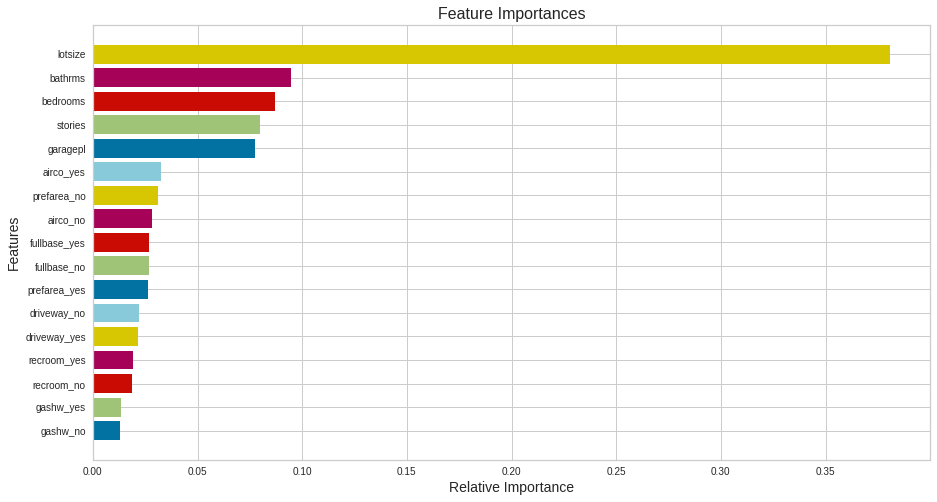

In [ ]:
# Have some patience, may take some time :)
figure = plt.figure(figsize = [15, 8])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative = False)
viz.fit(X, y)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

<a name = Section63></a>
### **6.3 Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (436, 17) (436,)
Testing Data Shape: (109, 17) (109,)


**Observation:**

- Now that we have split our data we are **ready** to move to the **next part** and that is Model Development & Evaluation.

<a name = Section7></a>

---
# **7. Model Development & Evaluation**
---

- In this section we will develop stacking classifier with the help of different estimators such as:
  - Logistic Regression
  - Support Vector Classifier
  - K Nearest Neighbor Classifier
  - Random Forest Classifier
  - Gradient Boosting Classifier

- For estimating the **performance** of the **model** we will be using **accuracy** as a **metric**.

In [ ]:
%%time
# Creating a collection of estimators
estimators = [('logistic', LogisticRegression(class_weight='balanced', random_state=42, n_jobs=-1)), 
              ('svc', SVC(class_weight='balanced', random_state=42, probability=True)),
              ('knn', KNeighborsClassifier(n_jobs=-1)),
              ('randomforest', RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42))]

# Setting StackingClassifier with initiated estimators and a final estimator
stack_clf = StackingClassifier(estimators=estimators, 
                               final_estimator=GradientBoostingClassifier(random_state=42), 
                               n_jobs=-1, cv=5)
stack_clf.fit(X_train, y_train)

# Display the accuracy on train data and test data
print('Accuracy on Train data:', np.round(a=stack_clf.score(X_train, y_train), decimals=2))
print('Accuracy on Test data:', np.round(a=stack_clf.score(X_test, y_test), decimals=2))

Accuracy on Train data: 0.78
Accuracy on Test data: 0.72
CPU times: user 691 ms, sys: 20.4 ms, total: 711 ms
Wall time: 2.95 s


**Observation:**

- We can **observe** that **results** obtained by stacking of models are **generalizing well** on test data.

- In the last notebook, we achieved **99% accuracy** on the **train set** and **68% accuracy** on the **test set**.

- Now we can see that **overfitting** is **under control** by using a stacked generalization. 

<a name = Section8></a>

---
# **8. Conclusion**
---

- We **studied** the **characteristics** and **distribution** of data in brief.

- We investigated in-depth the **features** which to **retain** and which to **discard**.

- We performed **model development** by using a stacked generalization of a variety of algorithms.

- We observed **better results** as compared to the results obtained in the last notebook.

- This model will **help** the **company** in **saving** lot of **resources** (money, human resources, etc.).

- We **recommend** you to **experiment** with **more hyperparameter** and try to enhance the results of the model.